In [122]:
import pandas as pd
import numpy as np

In [123]:
final_df = pd.read_csv('final_df.csv')

final_df.head()

,RACE,ETHNICITY,GENDER,Body Weight,Heart rate,Oxygen saturation in Arterial blood,Respiratory rate,CONDITIONS,AGE,DEATH_EVENT,MAP,MEDICATIONS,PROCEDURES
0,white,nonhispanic,F,8.3,136.5,78.6,14.0,"Pneumonia (disorder),Hypoxemia (disorder),Resp...",0,False,93.333333,0.4 ML Enoxaparin sodium 100 MG/ML Prefilled S...,"Plain chest X-ray (procedure),Oxygen administr..."
1,white,nonhispanic,F,74.6,89.8,88.9,21.3,"Pneumonia (disorder),Hypoxemia (disorder),Resp...",36,False,94.000000,0.4 ML Enoxaparin sodium 100 MG/ML Prefilled S...,"Plain chest X-ray (procedure),Oxygen administr..."
2,white,nonhispanic,F,76.5,130.8,76.9,37.1,"Pneumonia (disorder),Hypoxemia (disorder),Resp...",60,False,92.666667,0.4 ML Enoxaparin sodium 100 MG/ML Prefilled S...,"Plain chest X-ray (procedure),Oxygen administr..."
3,white,nonhispanic,F,85.9,136.5,78.9,14.9,"Pneumonia (disorder),Hypoxemia (disorder),Resp...",61,False,86.666667,0.4 ML Enoxaparin sodium 100 MG/ML Prefilled S...,"Plain chest X-ray (procedure),Oxygen administr..."
4,white,hispanic,M,87.7,194.2,86.9,24.2,"Pneumonia (disorder),Hypoxemia (disorder),Resp...",32,False,88.333333,0.4 ML Enoxaparin sodium 100 MG/ML Prefilled S...,"Plain chest X-ray (procedure),Oxygen administr..."


# Feature Engineering
Converting numerical features to categorical features suitable for processing by LLM. 

In [124]:
# Change values of M and F to female and male 
final_df['GENDER'] = final_df['GENDER'].replace({'M': 'male', 'F': 'female'})

# Value counts for GENDER
final_df['GENDER'].value_counts()



GENDER
female    1183
male      1061
Name: count, dtype: int64

In [125]:
# Change the numerical values of age to age categories according to the WHO guidelines
final_df['AGE'] = pd.cut(final_df['AGE'], bins=[-1, 5, 15, 25, 65, 120], labels=['infant', 'child', 'youth', 'adult', 'elderly'])

# Value counts for AGE
final_df['AGE'].value_counts()



AGE
adult      1304
elderly     671
youth       169
child        66
infant       34
Name: count, dtype: int64

In [126]:
# Change the numerical values of MAP to categories according to the WHO guidelines
final_df['MAP'] = pd.cut(final_df['MAP'], bins=[0, 85, 95, 110, 125, 145], labels=['normal', 'elevated', 'hypertension stage 1', 'hypertension stage 2', 'hypertensive crisis'])

# Value counts for MAP
final_df['MAP'].value_counts()

MAP
elevated                1385
hypertension stage 1     643
normal                    96
hypertensive crisis       70
hypertension stage 2      50
Name: count, dtype: int64

In [127]:
# Change the numerical values of body weight to categories based on their age group
final_df['Body Weight'] = np.where(final_df['AGE'] == 'infant', pd.cut(final_df['Body Weight'], bins=[-1, 4, 10, 20, 30], labels=['underweight', 'normal weight', 'overweight', 'obese']),
                    np.where(final_df['AGE'] == 'child', pd.cut(final_df['Body Weight'], bins=[-1, 10, 20, 40, 60], labels=['underweight', 'normal weight', 'overweight', 'obese']),
                    np.where(final_df['AGE'] == 'youth', pd.cut(final_df['Body Weight'], bins=[-1, 50, 70, 90, 110], labels=['underweight', 'normal weight', 'overweight', 'obese']),
                    np.where(final_df['AGE'] == 'adult', pd.cut(final_df['Body Weight'], bins=[-1, 50, 70, 90, 110], labels=['underweight', 'normal weight', 'overweight', 'obese']),
                    np.where(final_df['AGE'] == 'elderly', pd.cut(final_df['Body Weight'], bins=[-1, 50, 70, 90, 110], labels=['underweight', 'normal weight', 'overweight', 'obese']), None)))))

# Value counts for Body Weight
final_df['Body Weight'].value_counts()



Body Weight
overweight       1359
obese             537
normal weight     297
underweight         9
Name: count, dtype: int64

In [128]:
# Change the numerical values of heart rate to categories based on their age group
final_df['Heart rate'] = np.where(final_df['AGE'] == 'infant', pd.cut(final_df['Heart rate'], bins=[-1, 80, 100, 160, 180, 200], labels=['severe bradycardia', 'bradycardia', 'normal', 'mild tachycardia', 'severe tachycardia']),
                    np.where(final_df['AGE'] == 'child', pd.cut(final_df['Heart rate'], bins=[-1, 60, 70, 120, 140, 200], labels=['severe bradycardia', 'bradycardia', 'normal', 'mild tachycardia', 'severe tachycardia']),
                    np.where(final_df['AGE'] == 'youth', pd.cut(final_df['Heart rate'], bins=[-1, 50, 60, 100, 120, 200], labels=['severe bradycardia', 'bradycardia', 'normal', 'mild tachycardia', 'severe tachycardia']),
                    np.where(final_df['AGE'] == 'adult', pd.cut(final_df['Heart rate'], bins=[-1, 50, 60, 100, 120, 200], labels=['severe bradycardia', 'bradycardia', 'normal', 'mild tachycardia', 'severe tachycardia']),
                    np.where(final_df['AGE'] == 'elderly', pd.cut(final_df['Heart rate'], bins=[-1, 50, 60, 100, 120, 200], labels=['severe bradycardia', 'bradycardia', 'normal', 'mild tachycardia', 'severe tachycardia']), None)))))

# Value counts for Heart rate
final_df['Heart rate'].value_counts()

Heart rate
severe tachycardia    1215
normal                 593
mild tachycardia       273
bradycardia            150
severe bradycardia      13
Name: count, dtype: int64

In [129]:
# Change the numerical values of oxygen saturation to categories according to the WHO guidelines with more detailed hypoxemia grades
final_df['Oxygen saturation in Arterial blood'] = pd.cut(final_df['Oxygen saturation in Arterial blood'], 
                                                        bins=[-1, 85, 90, 95, 100], 
                                                        labels=['severe hypoxemia', 'moderate hypoxemia', 'normal', 'hyperoxemia'])

# Value counts for Oxygen saturation in Arterial blood
final_df['Oxygen saturation in Arterial blood'].value_counts()


Oxygen saturation in Arterial blood
severe hypoxemia      1580
moderate hypoxemia     664
normal                   0
hyperoxemia              0
Name: count, dtype: int64

In [130]:
# Change the numerical values of respiratory rate to categories based on their age group
final_df['Respiratory rate'] = np.where(final_df['AGE'] == 'infant', pd.cut(final_df['Respiratory rate'], bins=[-1, 30, 40, 60], labels=['bradypnea', 'normal', 'tachypnea']),
                    np.where(final_df['AGE'] == 'child', pd.cut(final_df['Respiratory rate'], bins=[-1, 20, 30, 40], labels=['bradypnea', 'normal', 'tachypnea']),
                    np.where(final_df['AGE'] == 'youth', pd.cut(final_df['Respiratory rate'], bins=[-1, 12, 20, 40], labels=['bradypnea', 'normal', 'tachypnea']),
                    np.where(final_df['AGE'] == 'adult', pd.cut(final_df['Respiratory rate'], bins=[-1, 12, 20, 40], labels=['bradypnea', 'normal', 'tachypnea']),
                    np.where(final_df['AGE'] == 'elderly', pd.cut(final_df['Respiratory rate'], bins=[-1, 12, 20, 40], labels=['bradypnea', 'normal', 'tachypnea']), None)))))

# Value counts for Respiratory rate
final_df['Respiratory rate'].value_counts()

Respiratory rate
tachypnea    1587
normal        611
bradypnea      46
Name: count, dtype: int64

In [131]:
# Ensure all features here are type string 
final_df = final_df.astype(str)

In [132]:
# Concatenate all the features into a single string for each row 
final_df['COMBINED'] = 'Patient is a ' + final_df['AGE'] + ' ' + final_df['RACE'] + ' ' + final_df['ETHNICITY'] + ' ' + final_df['GENDER']
final_df['COMBINED'] = final_df['COMBINED'] + '. They have a blood pressure that is ' + final_df['MAP'] + '. Their body weight is ' + final_df['Body Weight']
final_df['COMBINED'] = final_df['COMBINED'] + '. Their heart rate is ' + final_df['Heart rate'] + ' and their oxygen saturation is ' + final_df['Oxygen saturation in Arterial blood']
final_df['COMBINED'] = final_df['COMBINED'] + '. Their respiratory rate is ' + final_df['Respiratory rate']
final_df['COMBINED'] = final_df['COMBINED'] + '. The list of conditions they have are: ' + final_df['CONDITIONS']
final_df['COMBINED'] = final_df['COMBINED'] + '. The list of medications they are on are: ' + final_df['MEDICATIONS']
final_df['COMBINED'] = final_df['COMBINED'] + '. The list of procedures they have had are: ' + final_df['PROCEDURES']

# print an example of the combined features
final_df['COMBINED'].iloc[0]

'Patient is a infant white nonhispanic female. They have a blood pressure that is elevated. Their body weight is normal weight. Their heart rate is normal and their oxygen saturation is severe hypoxemia. Their respiratory rate is bradypnea. The list of conditions they have are: Pneumonia (disorder),Hypoxemia (disorder),Respiratory distress (finding),Acute pulmonary embolism (disorder). The list of medications they are on are: 0.4 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Dose Inhaler,Acetaminophen 500 MG Oral Tablet,1 ML Enoxaparin sodium 150 MG/ML Prefilled Syringe. The list of procedures they have had are: Plain chest X-ray (procedure),Oxygen administration by mask (procedure),Placing subject in prone position (procedure)'

In [133]:
# Create new dataframe with only the combined features
combined_df = final_df[['COMBINED', 'DEATH_EVENT']]

combined_df.head()

,COMBINED,DEATH_EVENT
0,Patient is a infant white nonhispanic female. ...,False
1,Patient is a adult white nonhispanic female. T...,False
2,Patient is a adult white nonhispanic female. T...,False
3,Patient is a adult white nonhispanic female. T...,False
4,Patient is a adult white hispanic male. They h...,False


In [134]:
# Change the Death Event values to binary 
combined_df['DEATH_EVENT'] = combined_df['DEATH_EVENT'].replace({'False': 0, 'True': 1})

combined_df.head()


C:\Users\alejm\AppData\Local\Temp\ipykernel_18544\1605916456.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['DEATH_EVENT'] = combined_df['DEATH_EVENT'].replace({'False': 0, 'True': 1})
C:\Users\alejm\AppData\Local\Temp\ipykernel_18544\1605916456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['DEATH_EVENT'] = combined_df['DEATH_EVENT'].replace({'False': 0, 'True': 1})


,COMBINED,DEATH_EVENT
0,Patient is a infant white nonhispanic female. ...,0
1,Patient is a adult white nonhispanic female. T...,0
2,Patient is a adult white nonhispanic female. T...,0
3,Patient is a adult white nonhispanic female. T...,0
4,Patient is a adult white hispanic male. They h...,0


In [135]:
# Let's see the distribution of the death event
combined_df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    1678
1     566
Name: count, dtype: int64

In [136]:
# Check if GPU is available
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [137]:
# Progress bar
from tqdm import tqdm

from transformers import AutoModel
model = AutoModel.from_pretrained("bionlp/bluebert_pubmed_mimic_uncased_L-12_H-768_A-12").to(device)


In [138]:
# Load the tokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bionlp/bluebert_pubmed_mimic_uncased_L-12_H-768_A-12")

In [139]:
# Tokenize the text
inputs = tokenizer(combined_df['COMBINED'].tolist(), padding=True, truncation=True, max_length=512, return_tensors="pt").to(device)


In [140]:
# print each unique token in the tokenizer
print(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))



['[CLS]', 'patient', 'is', 'a', 'infant', 'white', 'non', '##his', '##pani', '##c', 'female', '.', 'they', 'have', 'a', 'blood', 'pressure', 'that', 'is', 'elevated', '.', 'their', 'body', 'weight', 'is', 'normal', 'weight', '.', 'their', 'heart', 'rate', 'is', 'normal', 'and', 'their', 'oxygen', 'sat', '##uration', 'is', 'severe', 'h', '##yp', '##ox', '##emia', '.', 'their', 'respiratory', 'rate', 'is', 'brady', '##p', '##nea', '.', 'the', 'list', 'of', 'conditions', 'they', 'have', 'are', ':', 'pneumonia', '(', 'disorder', ')', ',', 'h', '##yp', '##ox', '##emia', '(', 'disorder', ')', ',', 'respiratory', 'distress', '(', 'finding', ')', ',', 'acute', 'pulmonary', 'em', '##bol', '##ism', '(', 'disorder', ')', '.', 'the', 'list', 'of', 'medications', 'they', 'are', 'on', 'are', ':', '0', '.', '4', 'ml', 'en', '##ox', '##apa', '##rin', 'sodium', '100', 'mg', '/', 'ml', 'pre', '##fi', '##lled', 'sy', '##ring', '##e', ',', 'n', '##da', '##0', '##20', '##50', '##3', '200', 'act', '##ua', '

In [141]:
import torch 
# Generate embeddings with a progress bar
embeddings = []
with torch.no_grad():
    for i in tqdm(range(len(inputs['input_ids']))):
        input_ids = inputs['input_ids'][i].unsqueeze(0)
        attention_mask = inputs['attention_mask'][i].unsqueeze(0)
        output = model(input_ids, attention_mask=attention_mask)
        embeddings.append(output.last_hidden_state[:, 0, :].squeeze().cpu().numpy())

  0%|          | 0/2244 [00:00<?, ?it/s]

100%|██████████| 2244/2244 [08:07<00:00,  4.61it/s]


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, combined_df['DEATH_EVENT'], test_size=0.2, random_state=42)

models = {RandomForestClassifier(): 'Random Forest', GradientBoostingClassifier(): 'Gradient Boosting', AdaBoostClassifier(): 'AdaBoost', LogisticRegression(max_iter=1000): 'Logistic Regression'}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{models[model]}')
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print()
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


Random Forest
Accuracy: 0.9220489977728286
Recall: 0.8532110091743119
Precision: 0.8303571428571429
F1 Score: 0.8416289592760181

[[321  19]
 [ 16  93]]
Gradient Boosting
Accuracy: 0.9287305122494433
Recall: 0.8440366972477065
Precision: 0.8598130841121495
F1 Score: 0.8518518518518519

[[325  15]
 [ 17  92]]


c:\Users\alejm\miniconda3\envs\healthcareAI\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy: 0.9287305122494433
Recall: 0.8532110091743119
Precision: 0.8532110091743119
F1 Score: 0.8532110091743119

[[324  16]
 [ 16  93]]
Logistic Regression
Accuracy: 0.9443207126948775
Recall: 0.908256880733945
Precision: 0.868421052631579
F1 Score: 0.8878923766816144

[[325  15]
 [ 10  99]]


<Axes: >

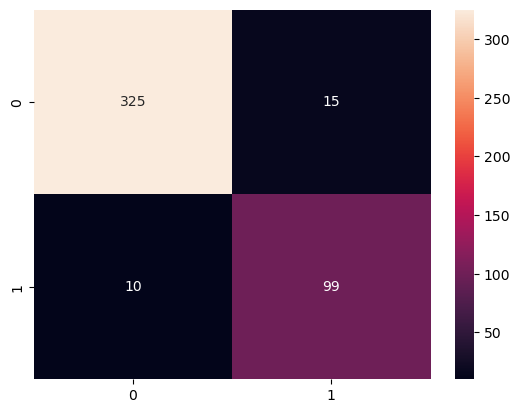

In [146]:
# Visualize a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g')

In [147]:
# Extract the feature importance
feature_importance = model.coef_[0]

# Print the feature importance
print(feature_importance)
print(feature_importance.shape)

[-0.24752715 -0.13125375  0.23307016  0.69275771 -0.24089826 -0.23949879
 -0.28968074 -0.21828064  0.01576678 -0.30221784 -0.18704747  0.0711593
 -0.14151679  0.45523021 -0.23220512  0.58828412 -0.18529031 -0.21068626
 -0.85196658  0.42180882  0.42379012 -0.75026707  0.37949477 -0.08495112
  0.4238249  -0.00301415  0.18200445 -1.18746137 -0.11010217 -0.02299124
 -0.27282571  0.03844499 -0.25618028  0.07086497 -0.22810898  0.13294533
 -0.08865082 -0.05321878  0.05788643 -0.14382274  0.48100005 -0.04580984
  0.04268297  0.04532437  0.14207427  0.13763533  0.05450256 -0.3022834
  0.09604841 -0.54709556  1.01344475 -0.22135254  0.37337845 -0.22110327
 -0.20804517 -0.05196474 -0.2051301  -0.63778078  0.39135806  0.37767169
 -0.39278247  0.11143468 -0.25175559  0.61762867  0.46958396 -0.00641933
  0.28655879  0.1963064   0.07110662 -0.18996709 -0.44878174  0.04571548
 -0.44548759 -0.25792847  0.41254943 -0.18345056 -0.11061862 -0.48916208
 -0.30780117 -0.10248453 -0.26253381  0.17031532 -0.3

In [148]:
# Pick a random index from the combined features
idx = np.random.randint(0, len(combined_df['COMBINED']))

# Print an example input
example_input = combined_df['COMBINED'].iloc[idx]
sentences = example_input.split('. ')
formatted_input = '.\n'.join(sentences)

# Print tokens that correspond each sentence
for sentence in sentences:
    tokens = tokenizer.tokenize(sentence)
    print(f'Sentence: {sentence}')
    print(f'Tokens: {tokens}')
    print()


Sentence: Patient is a youth white nonhispanic female
Tokens: ['patient', 'is', 'a', 'youth', 'white', 'non', '##his', '##pani', '##c', 'female']

Sentence: They have a blood pressure that is elevated
Tokens: ['they', 'have', 'a', 'blood', 'pressure', 'that', 'is', 'elevated']

Sentence: Their body weight is underweight
Tokens: ['their', 'body', 'weight', 'is', 'under', '##weight']

Sentence: Their heart rate is severe tachycardia and their oxygen saturation is severe hypoxemia
Tokens: ['their', 'heart', 'rate', 'is', 'severe', 'ta', '##chy', '##card', '##ia', 'and', 'their', 'oxygen', 'sat', '##uration', 'is', 'severe', 'h', '##yp', '##ox', '##emia']

Sentence: Their respiratory rate is tachypnea
Tokens: ['their', 'respiratory', 'rate', 'is', 'ta', '##chy', '##p', '##nea']

Sentence: The list of conditions they have are: Pneumonia (disorder),Hypoxemia (disorder),Respiratory distress (finding),Acute pulmonary embolism (disorder)
Tokens: ['the', 'list', 'of', 'conditions', 'they', 'have

In [154]:
# Plot these tokens on a scatter plot to visualize the feature importance
import matplotlib
from tqdm import tqdm
import matplotlib.pyplot as plt

# Map the feature importance to the tokens for all instances
token_importance = {}
token_counts = {}
for i in tqdm(range(len(inputs['input_ids']))):
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][i])
    for token, importance in zip(tokens, feature_importance[:len(tokens)]):
        if token in token_importance:
            token_importance[token] += importance
            token_counts[token] += 1
        else:
            token_importance[token] = importance
            token_counts[token] = 1

# Calculate the mean importance for each token
for token in token_importance:
    token_importance[token] /= token_counts[token]

# Sort the tokens by importance
sorted_token_importance = sorted(token_importance.items(), key=lambda x: x[1], reverse=True)

100%|██████████| 2244/2244 [02:20<00:00, 15.96it/s]


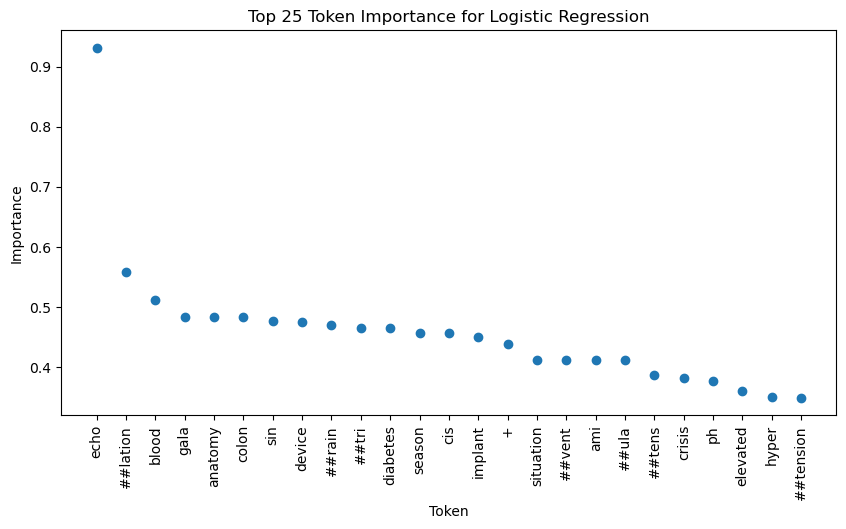

In [156]:
# Get the top 25 tokens by importance
top_25_tokens = sorted_token_importance[:25]

# Scatter plot the top 25 tokens and their importance
plt.figure(figsize=(10, 5))
plt.scatter(range(len(top_25_tokens)), [importance for token, importance in top_25_tokens])
plt.xticks(range(len(top_25_tokens)), [token for token, importance in top_25_tokens], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Token')
plt.title('Top 25 Token Importance for Logistic Regression')
plt.show()
